In [51]:
!pip install graphviz


In [53]:
# Import required libraries
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data= pd.read_csv("updated_data.csv")

In [57]:
# Step 1: Detailed EDA
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

print("\nMissing Values Count:")
print(missing_values)

print("\nPercentage of Missing Values:")
print(missing_percentage)


Dataset Overview:
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Married  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          1

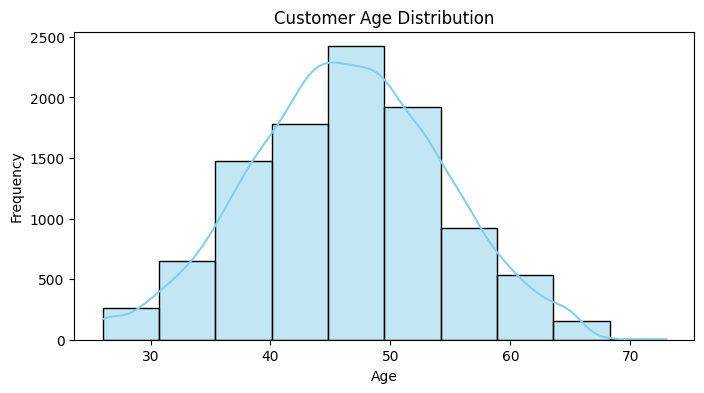

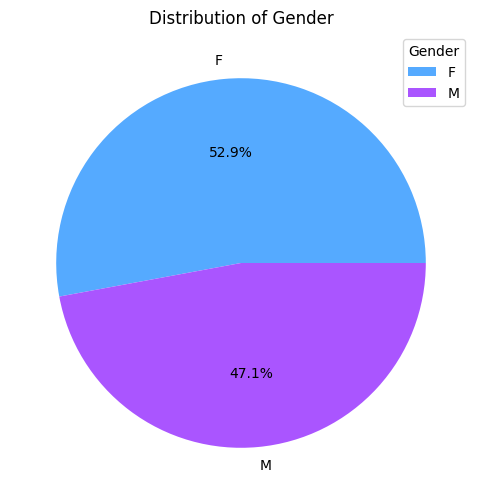

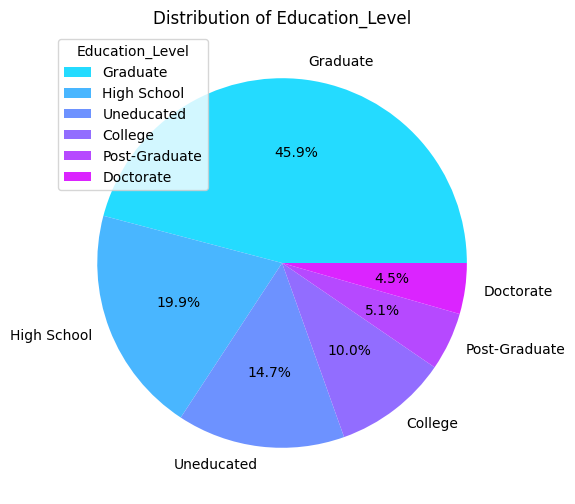

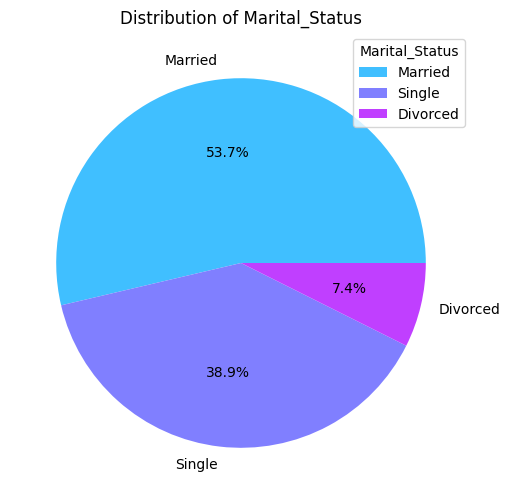

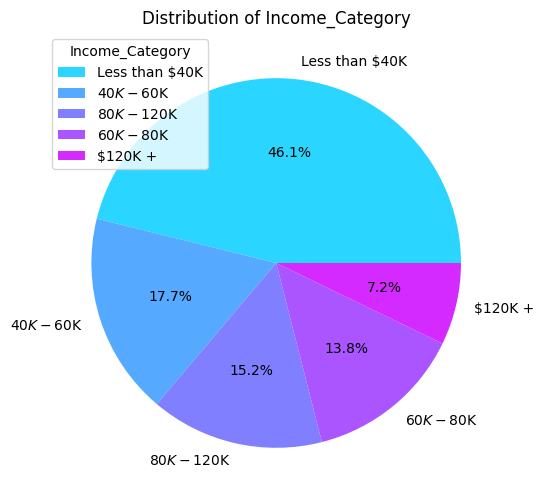

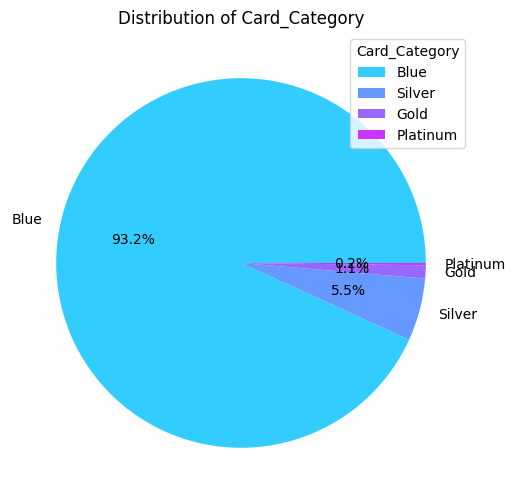

In [59]:
# Distribution of a sample numerical column (e.g., 'Customer_Age' if present)
plt.figure(figsize=(8, 4))
sns.histplot(data['Customer_Age'], kde=True, color='skyblue', bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in categorical_columns:
     plt.figure(figsize=(6, 6))
     value_counts = data[col].value_counts()
     colors = sns.color_palette("cool", len(value_counts))
     plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 10})
     plt.legend(title=col, loc="best", fontsize=10)
     plt.title(f"Distribution of {col}")
     plt.show()

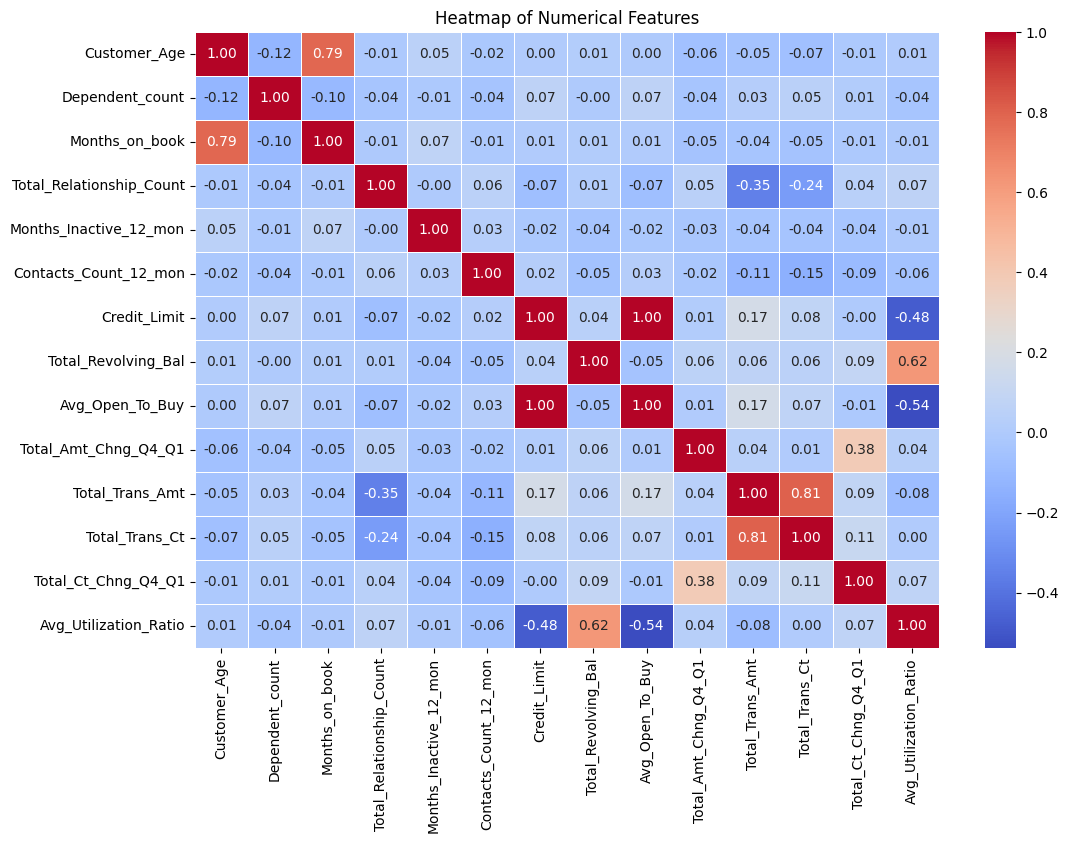

In [81]:
excluded_columns = [
    'CLIENTNUM', 'Attrition_Flag', 'Gender', 'Education_Level', 
    'Marital_Status', 'Income_Category', 'Card_Category',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
numeric_data = data.drop(columns=excluded_columns, errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Numerical Features")
plt.show()

In [61]:
data.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [63]:
data.drop('CLIENTNUM', axis=1, inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [65]:
# List of categorical columns
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Encoding the categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [67]:

data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,0,4,3,1,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,1,2,2,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,1,2,2,1,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [69]:

# Drop the 'Attrition_Flag' column from the dataset to create the features (X)
X = data.drop(columns=['Attrition_Flag'])  

# Define 'Attrition_Flag' as the target variable (y)
y = data['Attrition_Flag']  


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42) 

# Handle imbalance with SMOTE (Synthetic Minority Oversampling Technique).
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

my_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=101)
my_classifier = my_classifier.fit(X_train_balanced, y_train_balanced)


[Text(0.5739018181068601, 0.975, 'x[16] <= 55.5\nentropy = 1.0\nsamples = 13602\nvalue = [6801, 6801]'),
 Text(0.2573641573218997, 0.925, 'x[12] <= 667.5\nentropy = 0.79\nsamples = 7440\nvalue = [5675, 1765]'),
 Text(0.41563298771437995, 0.95, 'True  '),
 Text(0.08540155013192612, 0.875, 'x[8] <= 2.5\nentropy = 0.358\nsamples = 4014\nvalue = [3742, 272]'),
 Text(0.0079155672823219, 0.825, 'x[14] <= 0.788\nentropy = 0.034\nsamples = 1403\nvalue = [1398, 5]'),
 Text(0.005277044854881266, 0.775, 'entropy = 0.0\nsamples = 1018\nvalue = [1018, 0]'),
 Text(0.010554089709762533, 0.775, 'x[14] <= 0.788\nentropy = 0.1\nsamples = 385\nvalue = [380, 5]'),
 Text(0.0079155672823219, 0.725, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.013192612137203167, 0.725, 'x[12] <= 576.0\nentropy = 0.066\nsamples = 383\nvalue = [380.0, 3.0]'),
 Text(0.005277044854881266, 0.675, 'x[6] <= 2.5\nentropy = 0.027\nsamples = 371\nvalue = [370, 1]'),
 Text(0.002638522427440633, 0.625, 'entropy = 0.0\nsamples

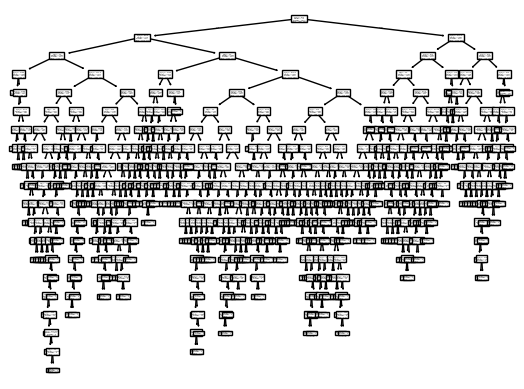

In [73]:
tree.plot_tree(my_classifier)

In [75]:
# Visualize with Graphviz
dot_data = export_graphviz(my_classifier, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No', 'Yes'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render("decision_tree_2")
graph.view() 

'decision_tree_2.pdf'

Decision Tree Accuracy: 92.10%


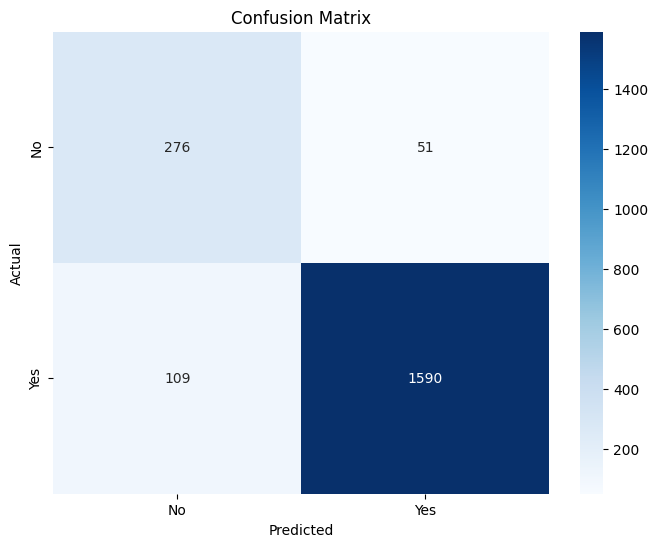


Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.72      0.84      0.78       327
Existing Customer       0.97      0.94      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.84      0.89      0.86      2026
     weighted avg       0.93      0.92      0.92      2026



In [76]:

y_pred = my_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


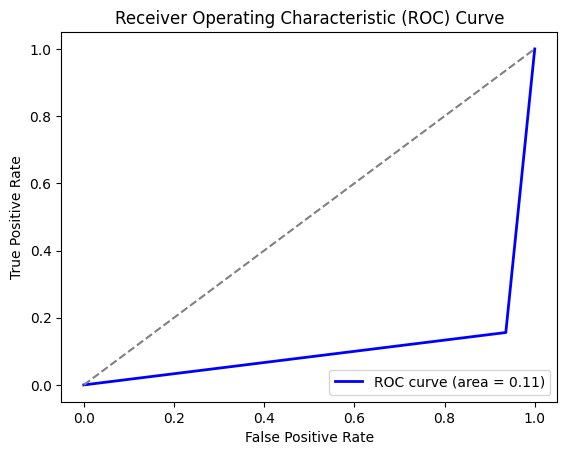

In [83]:
# ROC Curve
y_test_binary = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

y_prob = my_classifier.predict_proba(X_test)[:, 1]  # Probability estimates
fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()